In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
X = np.array([[1,1],
              [2,2],
              [3,3],
              [4,4],
              [5,5],
              [1,0],
              [4,0],
              [0,4],
              [2,3],
              [1,3],
              [3,1],
              [3,0]])

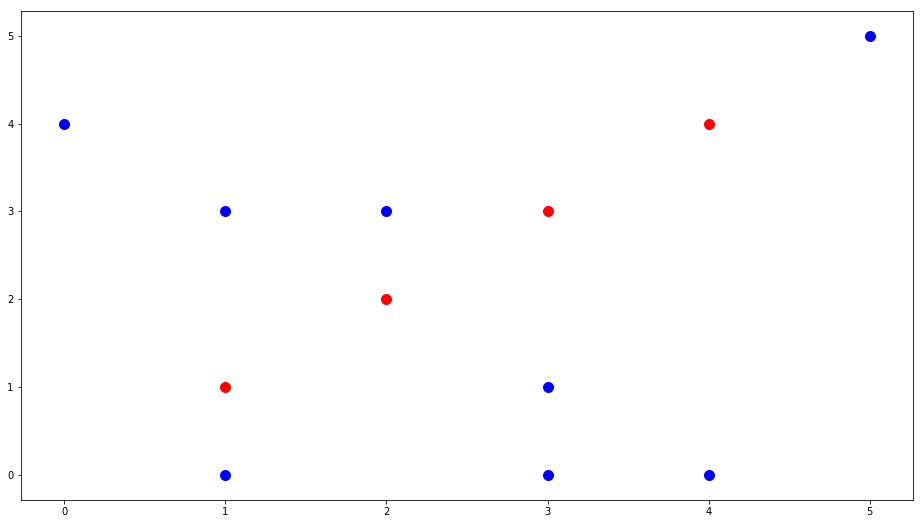

In [69]:
plt.figure(figsize=(16, 9))
plt.scatter(X[:4, 0], X[:4, 1], s=100, c='r')
plt.scatter(X[4:, 0], X[4:, 1], s=100, c='b')

In [70]:
scenario = X[:4, :]

In [71]:
scenario.shape

(4L, 2L)

In [72]:
data = scenario - scenario.mean(axis=0)

In [73]:
R = np.cov(data.astype(float), rowvar=False)

In [74]:
evals, evecs = np.linalg.eigh(R)

In [75]:
idx = np.argsort(evals)[::-1]

In [76]:
evecs = evecs[:, idx]

In [77]:
evals = evals[idx]

In [78]:
evals.cumsum() / evals.sum()

array([ 1.,  1.])

In [79]:
K = 1

In [80]:
evecs[:, 0]

array([ 0.70710678,  0.70710678])

In [81]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    ang = np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
    return ang if ang < np.pi else np.pi - ang

In [83]:
angles = []
for i in range(X.shape[0]):
    print X[i, :], evecs[:, 0]
    ang = angle_between(X[i,:], evecs[:, 0].T)
    print ang
    angles.append(ang)

[1 1] [ 0.70710678  0.70710678]
0.0
[2 2] [ 0.70710678  0.70710678]
0.0
[3 3] [ 0.70710678  0.70710678]
0.0
[4 4] [ 0.70710678  0.70710678]
0.0
[5 5] [ 0.70710678  0.70710678]
0.0
[1 0] [ 0.70710678  0.70710678]
0.785398163397
[4 0] [ 0.70710678  0.70710678]
0.785398163397
[0 4] [ 0.70710678  0.70710678]
0.785398163397
[2 3] [ 0.70710678  0.70710678]
0.19739555985
[1 3] [ 0.70710678  0.70710678]
0.463647609001
[3 1] [ 0.70710678  0.70710678]
0.463647609001
[3 0] [ 0.70710678  0.70710678]
0.785398163397


In [84]:
print angles

[0.0, 0.0, 0.0, 0.0, 0.0, 0.78539816339744828, 0.78539816339744828, 0.78539816339744828, 0.19739555984988044, 0.46364760900080593, 0.46364760900080593, 0.78539816339744828]


In [91]:
random_x = np.random.rand(50,2)
sp_x = np.array([[0.1,0.1], [0.3, 0.3], [0.7,0.8], [0.6,0.56], [0.3,0.25], [0.9, 0.93], [0.5, 0.53]])

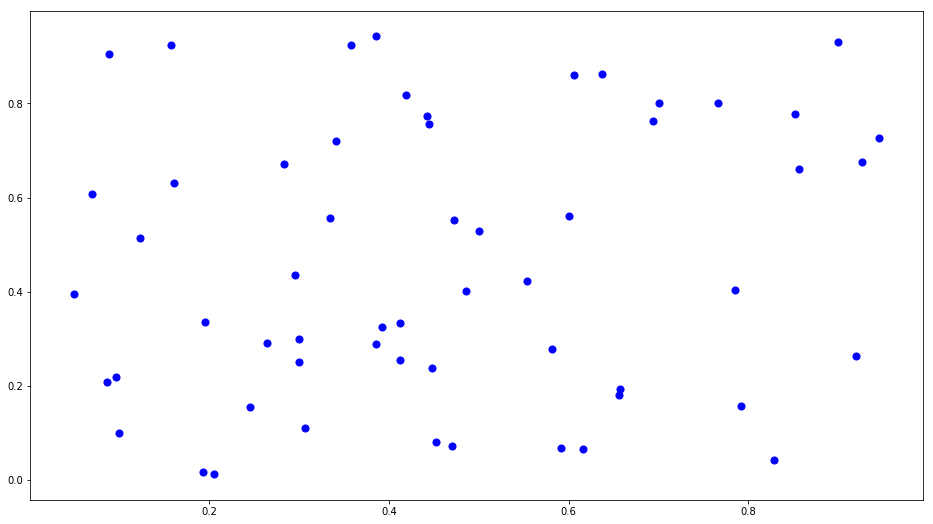

In [94]:
plt.figure(figsize=(16, 9))
plt.scatter(random_x[:, 0], random_x[:, 1], s=50, c='b')
plt.scatter(sp_x[:, 0], sp_x[:, 1], s=50, c='b')